## 4.2 T-TEST
### 4.2.1 일표본 T-검정(One Sample T-Test)
__가.__ 일표본 T-검정 개념
- 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교
- 가정 : 모집단의 구성요소들이 정규분포를 이룬다는 가정
       * 종속변수는 연속형이어야 함
       * 검증하고자하는 기준값이 있어야 함.
__나.__ 일표본 T-검정 단계

|1단계: |가설설정|  |
|------|---|---|
|모수|모평균(μ)|  |
|귀무가설(H0)|μ=μ0|  |
|대립가설(H1)|(1) 양측검정: |μ!=μ0|
| |(2) 우단측검정: |μ>μ0|
| |(3) 좌단측검정: |μ<μ0|

|2단계: |유의수준 설정|          |
|------|---|---|
      
      
|3단계: |검정통계량의 값 및 유의확률 계산|  |
|------|---|---|
      
      
|4단계: |귀무가설의 기각여부 판단 및 의사결정|
|------|---|
|p-value:|유의확률|
|α: | 유의수준|
|p-value < α:|귀무가설을 기각하고, 대립가설을 채택|
|p-value > α:|귀무가설을 기각하지 않음|

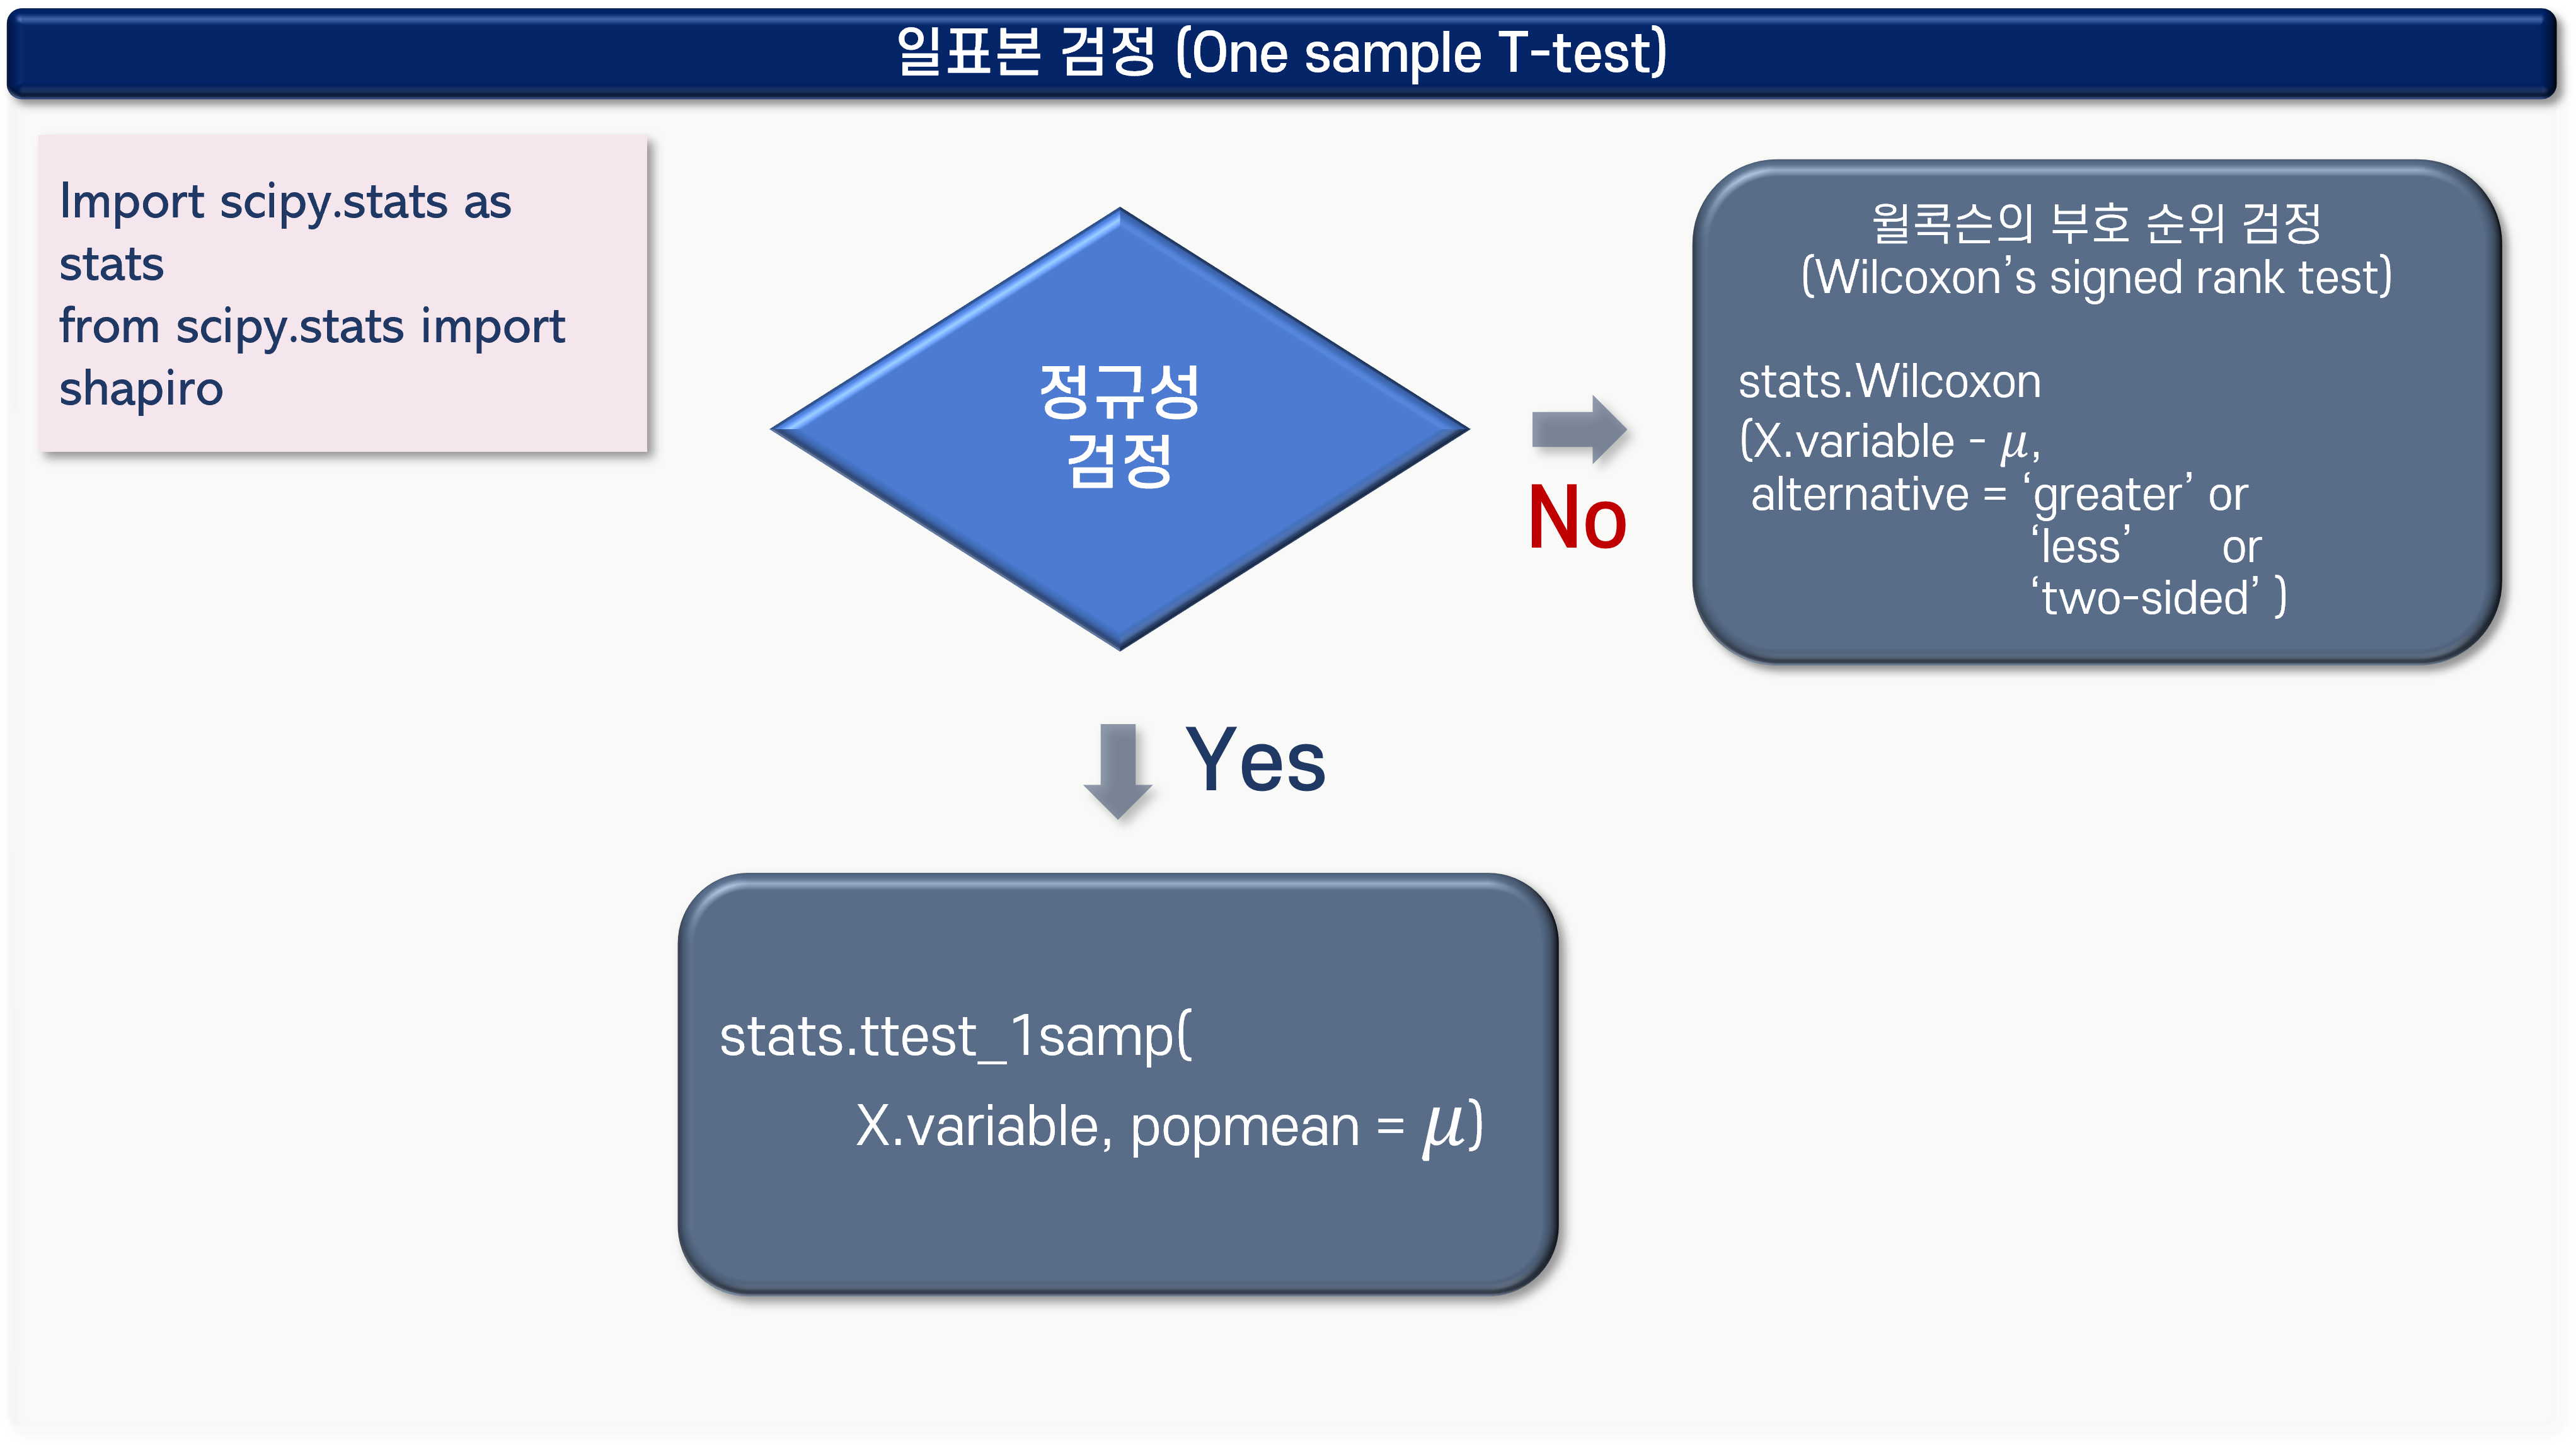

__[예제]__  
cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지통계적 검정을 수행하고, 결과 해석하기   
(양측검정, 유의수준 = 0.05)

In [5]:
import pandas as pd
cats = pd.read_csv('./data/cats.csv')
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [6]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [9]:
# cats의 Bwt의 정규성 검정 : Shapiro test
# 귀무가설 : 정규성을 가진다
# 대립가설 : 정규성 x 
import scipy.stats as stats
from scipy.stats import shapiro
mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

[결과해석]  
* 첫번째 값 (검정통계치) : 0.95187
* 두번째 값 (p-value) : 6.730e-05   
==> 유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다.   
==> 즉, cats 데이이터의 Bwt 변수는 __정규분포를 따르지 않음__    
==> __wilcox test__ 로 T-검정 진행

In [10]:
# cats의 Bwt t-test(wilcox test)
stats.wilcoxon(cats.Bwt -mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

### 분포 시각화

In [12]:
import matplotlib.pyplot as plt

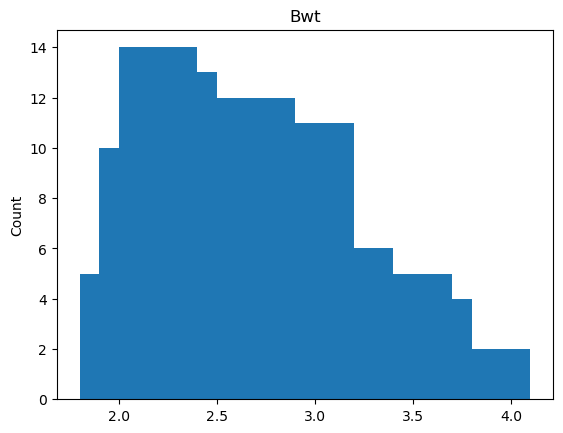

In [15]:
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)

width = 0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count')
plt.show()

[결과해석]   
* 첫번째 값 (검정통게치) : 3573.0   
* 두번째 값 (p-value) : 0.025   
==> 유의수준보다 작으므로 '고양이들의 평균 몸무게는 2.6kg이다'는 귀무가설을 기각한다   
==> 즉, 고양이들의 평균 몸무게는 2.6kg이 아니라는 결론

-------
## 대응표본 T-검정 (Paired Sample T-Test)
__가.__ 대응표본 T-검정 개념   
* 단일모집단에 대해 두 번의 처리를 가했을 떄, 두 개의 처리에 따른 평균의 차이를 비교
* 표본 내의 개체들에 대해 두 번의 측정 실시
* 가정: 모집단의 관측값이 정규성을 만족해야함
    
    
__나.__ 대응표본 T-검정 단계

|1단계: |가설설정|  |
|------|---|---|
|모수|두 개 모평균 사이의 차이(D)|  |
|귀무가설(H0)|μx-μy=D=0|  |
|대립가설(H1)|(1) 양측검정: |μx-μy=D!=0|
| |(2) 우단측검정: |μx-μy=D>0|
| |(3) 좌단측검정: |μx-μy=D<0|
      
      
|2단계: |유의수준 설정|          |
|------|---|---|
      
      
|3단계: |검정통계량의 값 및 유의확률 계산|  |
|------|---|---|
      
      
|4단계: |귀무가설의 기각여부 판단 및 의사결정|
|------|---|
|p-value:|유의확률|
|α: | 유의수준|
|p-value < α:|귀무가설을 기각하고, 대립가설을 채택|
|p-value > α:|귀무가설을 기각하지 않음 --> 사전평균 = 사후평균|



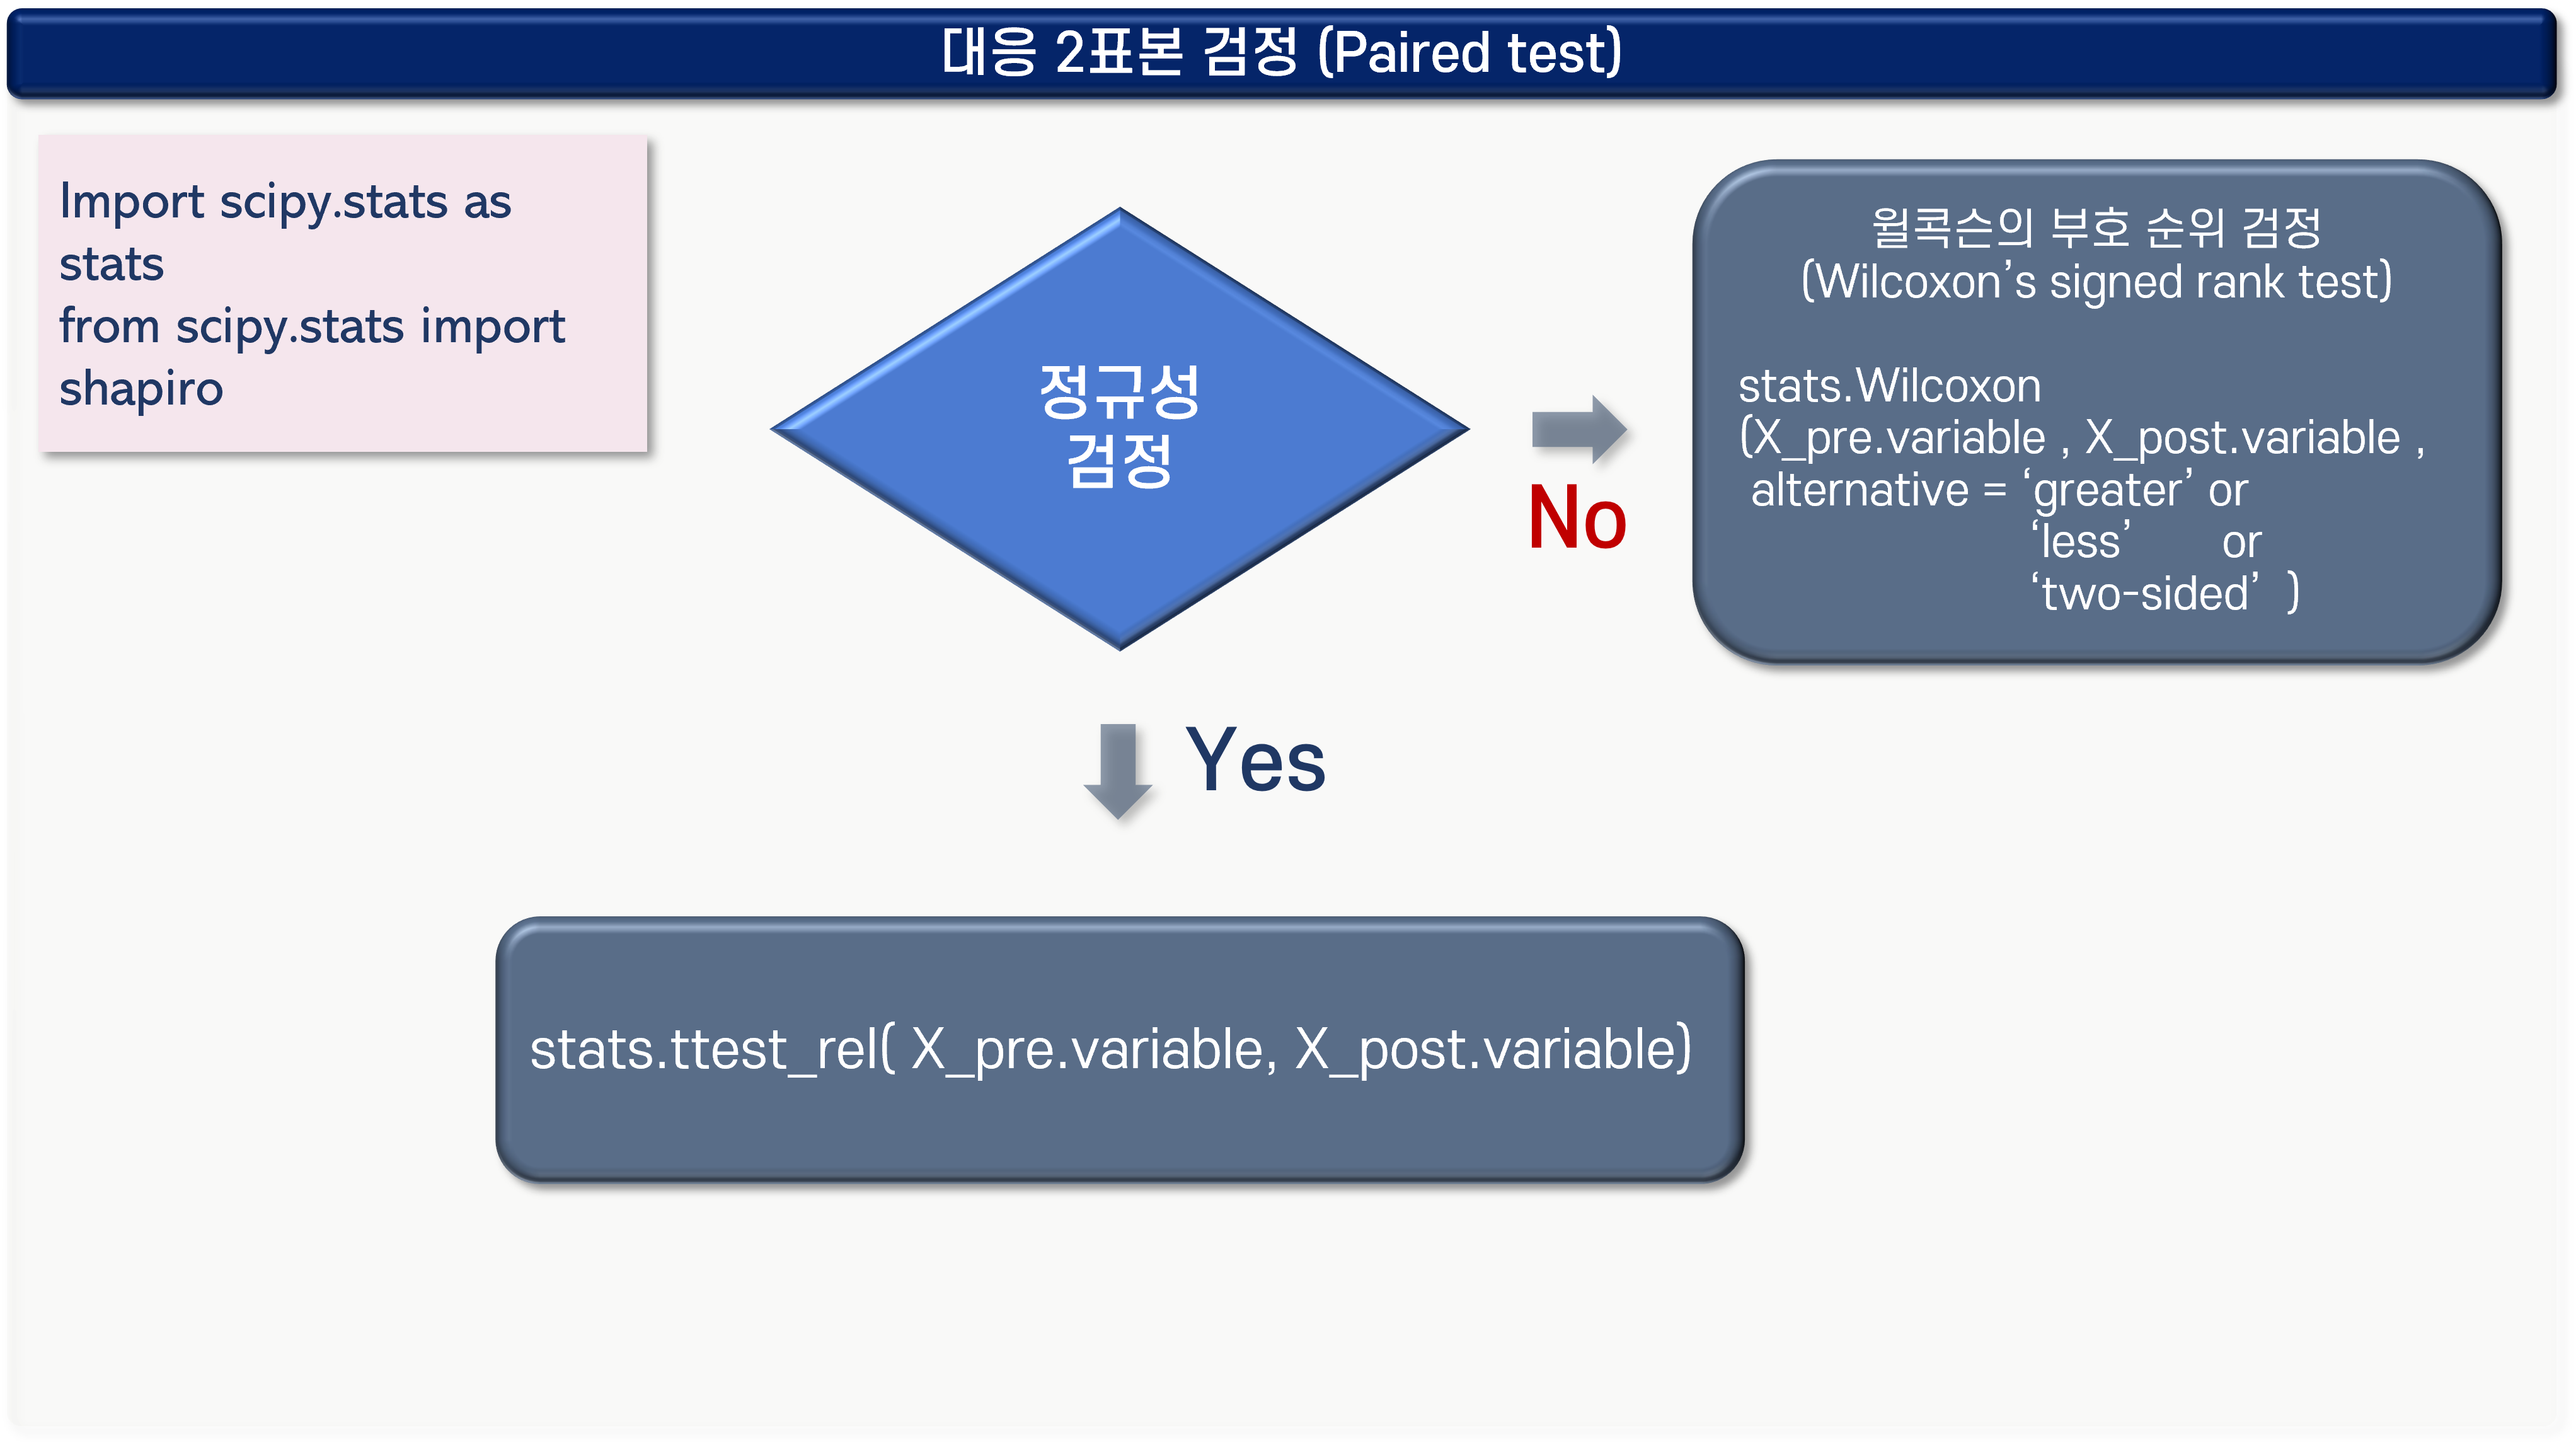

__[예제]__  
10명의 환자 대상 수면영양제 복용 전과 후의 수면시간 측정    
영양제의 효과가 있는지를 판단하고자 함.     
(표본이 정규성을 만족한다는 가정 하에 단측검정 수행, 유의수준 = 0.05)

In [19]:
import pandas as pd
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [20]:
# 분포 확인
data.mean()

before    4.3
after     5.3
dtype: float64

In [25]:
import scipy.stats as stats
from scipy.stats import shapiro 
stats.ttest_rel(data['after'],data['before'],alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

[결과해석]   
* 첫번째 값 (검정통게치) : 4.7434   
* 두번째 값 (p-value) : 0.001   
==> 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는 결론

-------
## 독립표본 T-검정 (Independent Sample T-Test)
__가.__ 독립표본 T-검정 개념   
* 두 개의 독립된 모집단의 평균을 비교
* 모집단, 모수, 표본이 모두 두 개씩 존재
* 가정
    * 두 모집단은 정규성 만족해야함
    * 두 모집단의 분산이 서로 같아야 함 (등분산성 가정)
    * 독립변수는 범주형, 종속변수는 연속형
    
    
__나.__ 독립표본 T-검정 단계

|1단계: |가설설정|  |
|------|---|---|
|모수|서로 독립된 두 모집단의 평균(μ1, μ2)|  |
|귀무가설(H0)|μ1=μ2|  |
|대립가설(H1)|(1) 양측검정: |μ1!=μ2|
| |(2) 우단측검정: |μ1>μ2|
| |(3) 좌단측검정: |μ1<μ2|
      
|2단계: |유의수준 설정|          |
|------|---|---|
      
      
|3단계: |검정통계량의 값 및 유의확률 계산|  |
|------|---|---|
      
      
|4단계: |귀무가설의 기각여부 판단 및 의사결정|
|------|---|
|p-value:|유의확률|
|α: | 유의수준|
|p-value < α:|귀무가설을 기각하고, 대립가설을 채택|
|p-value > α:|귀무가설을 기각하지 않음|

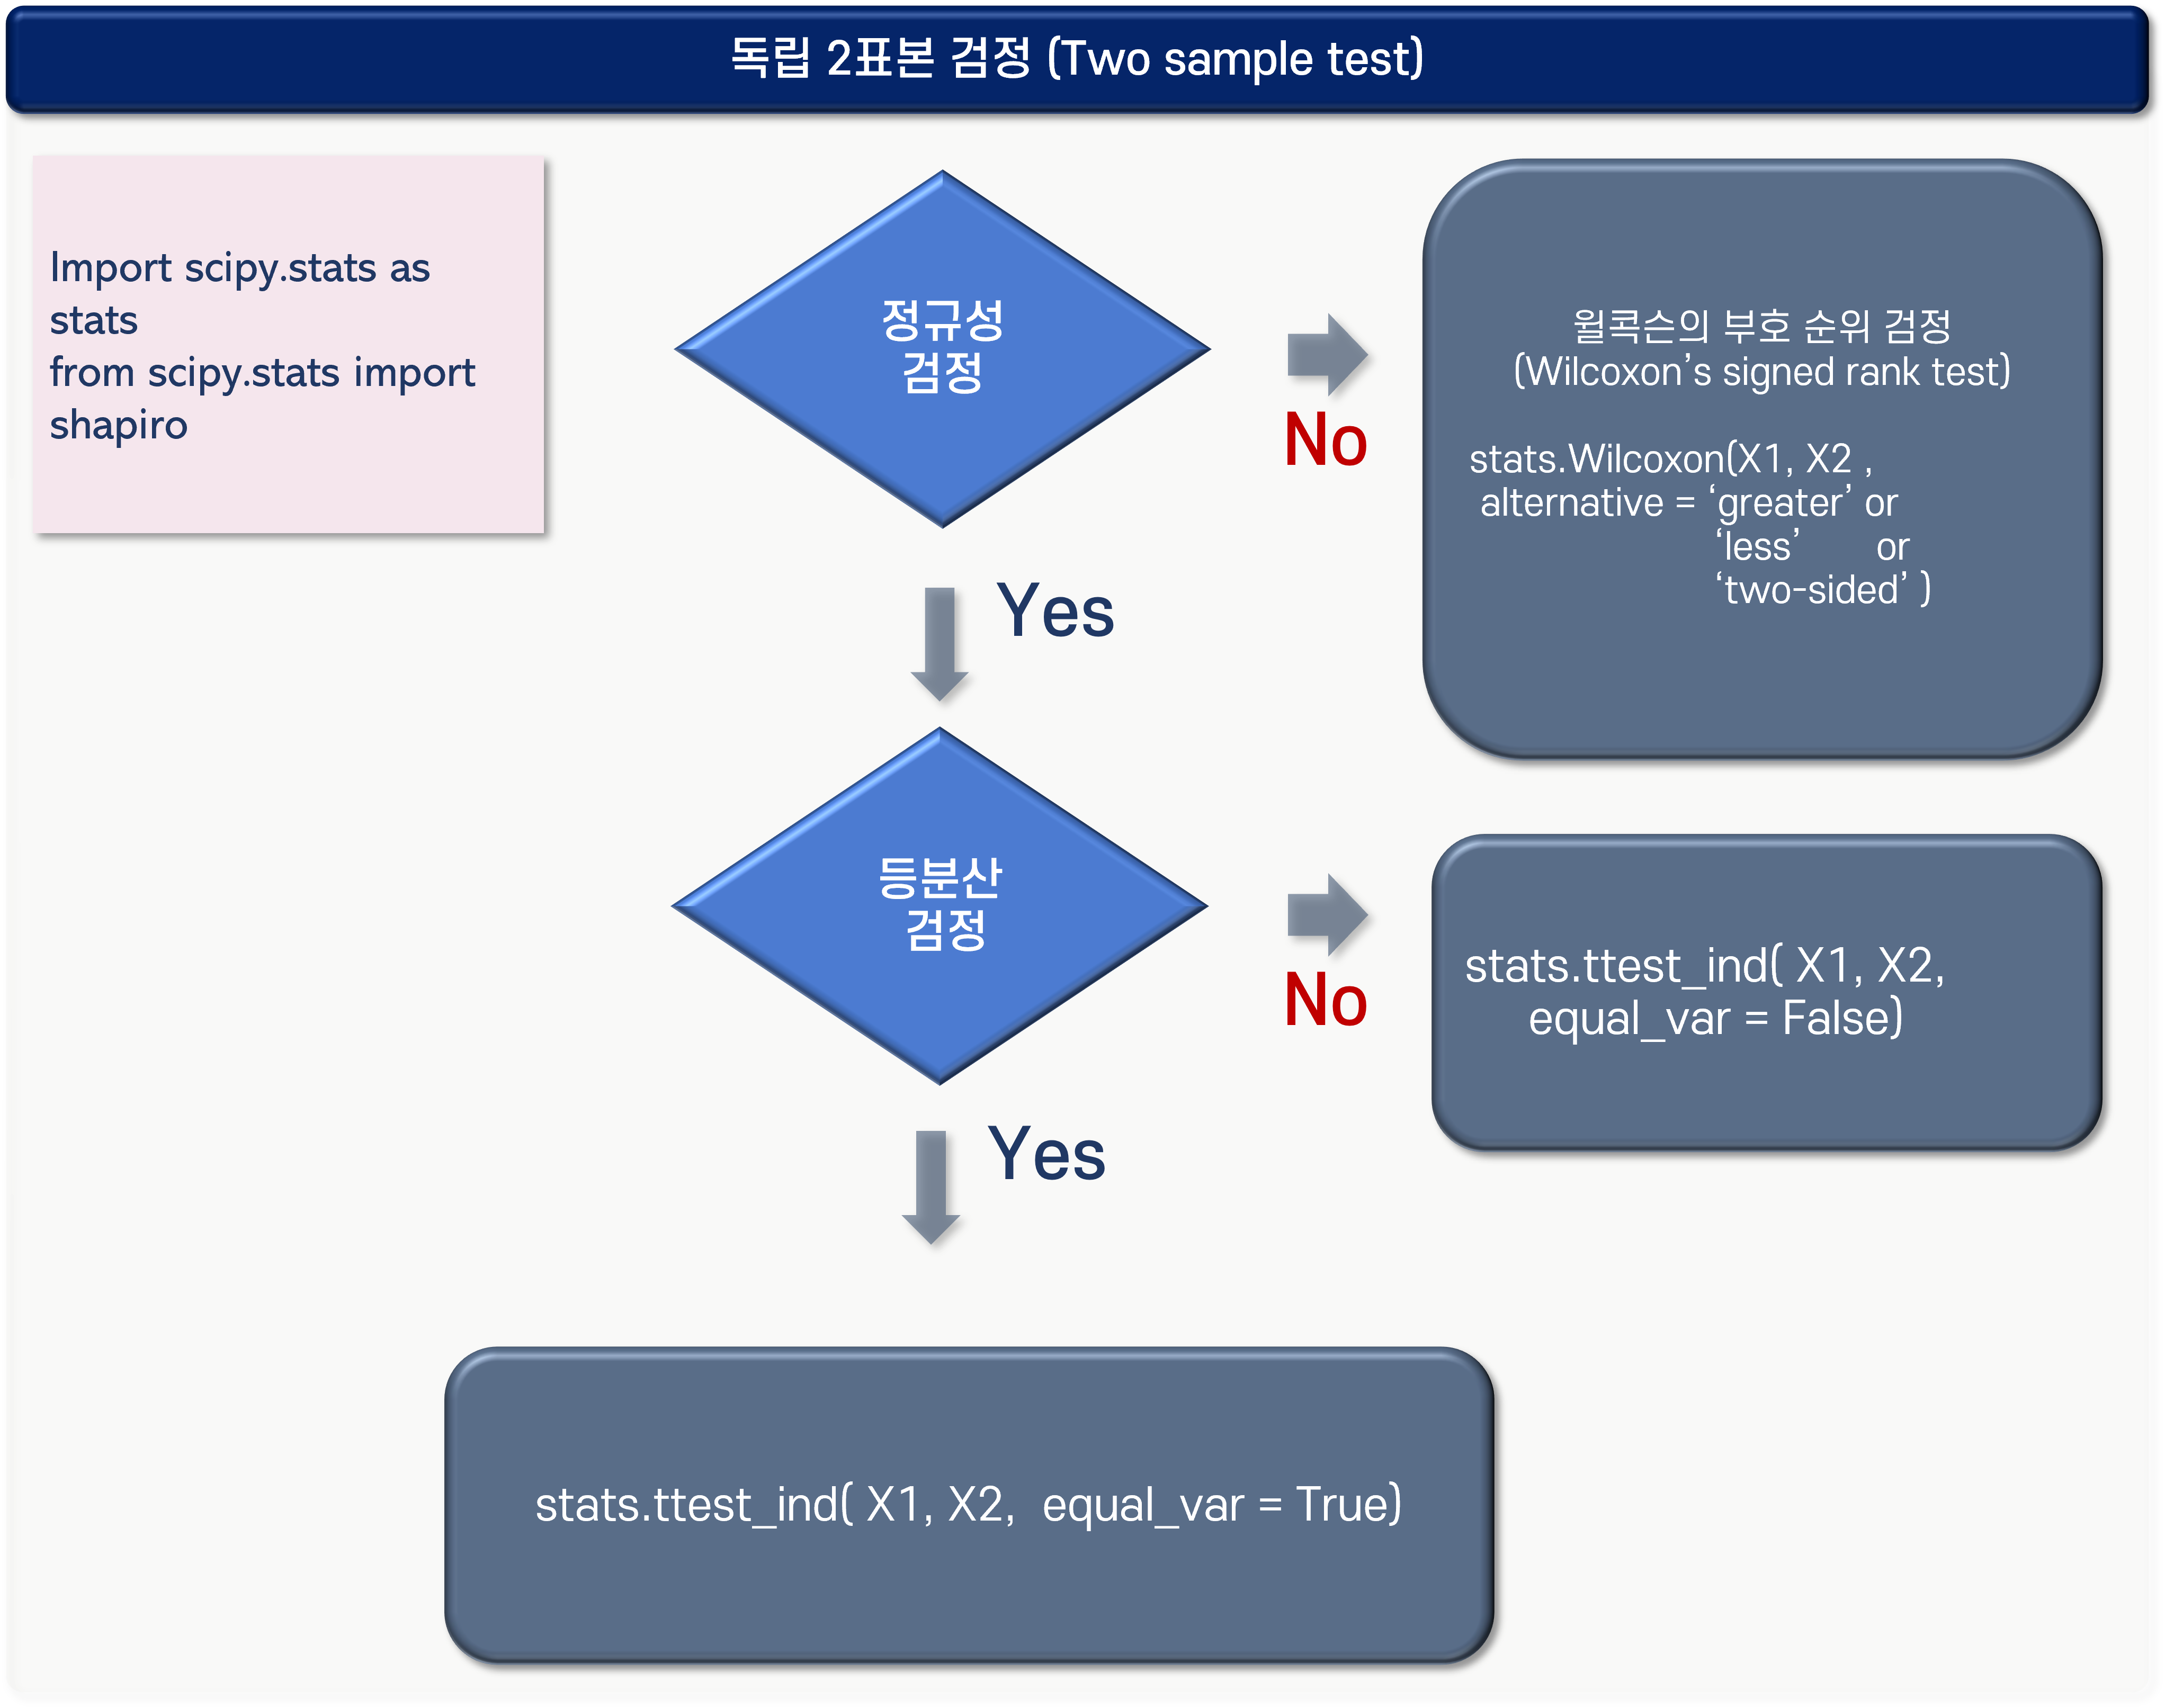

In [26]:
# 정규성 검정
import scipy.stats as stats
from scipy.stats import shapiro
stats.shapiro(cats.Bwt)
### h0 : 표본분포가 정규성을 따른다
# 검정결과 : 귀무가설 기각(표본의 모집단이 정규분포를 따르지 않음)

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

In [27]:
# 데이터 확인
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [ ]:
# 등분산검정